In [1]:
%matplotlib inline
import bluepyopt as bpop
import epileptor_evaluator
import epileptor_util
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pickle


def save_obj(obj, name):
    with open('obj/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)


/Users/emilyschlafly/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [22]:
x = np.random.rand(3) * 10
print(x)
for i in range(10):
    x*=x
    if any(np.isinf(x)):
        break
print(x, i)

[ 3.97290354  2.69427989  7.69731738]
(array([  5.53740755e+306,   2.43594615e+220,               inf]), 8)


/Users/emilyschlafly/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in multiply


## Testing Optimization with Simulated Data
Run two separate tests of the optimization with different seeds. Protocol for this run was the simulation from the Jirsa paper.

In [291]:
if 0:  # Reload files if changed
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)

hall_of_fame = []
for i in range(2):
    evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=False,
                                                        total_time=2500,
                                                        dt_sample=0.1)
    opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=50,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7, seed=i)
    final_pop, hof_temp, log, hst = opt.run(max_ngen=50)
    hall_of_fame.append(hof_temp[0])

### Results
Note that these results are from an optimization with offspring size 50 and max 50 generations. The remaining optimization parameters are what is used in the Graupner-Brunel example of the BluePyOpt package.

In [309]:
for i in range(2):
    print('{}: {}\n'.format(hall_of_fame[i].fitness.values[0], hall_of_fame[i]))

0.644515605244: [0.8368029660323595, 3.05216921279333, 2819.6434922641793]

0.643895744382: [-4.510028364281401, 3.065109113218392, 2762.8956323599145]



The actual values from the simulated data are:

This took a while... Need to do a timing analysis and also figure out how to run this on SCC. The paper says that the optimization can be parallelized by giving a 'map' function implementation - DEAP authors recommend SCOOP. The paper is given in full at the following website, but details of implementation are not discussed - check citations. http://journal.frontiersin.org/article/10.3389/fninf.2016.00017/full

The following shows the result from the model with the parameters found in the optimization. The target is in black and the two results are in blue and red. Simulation 2 has a slightly shorter time scale for the permittivity variable (tau0), which can be seen in the plots.

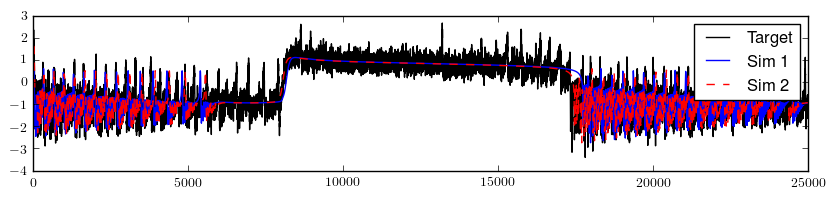

In [329]:
sim0 = epileptor_util.epileptor_model(params=evaluator.get_param_dict(hall_of_fame[0]))
sim0.generate_simulation(plot=False)
sim1 = epileptor_util.epileptor_model(params=evaluator.get_param_dict(hall_of_fame[1]))
sim1.generate_simulation(plot=False)
plt.figure(figsize=(10,2))
plt.plot(evaluator.target[0][0], 'k', label='Target')
plt.plot(sim0.noisy_data[0], 'b', label='Sim 1')
plt.plot(sim1.noisy_data[0], 'r--', label='Sim 2')
plt.legend()
plt.show()

In [341]:
good_solutions = [evaluator.get_param_dict(ind) for ind in hst.genealogy_history.itervalues() 
                  if np.all(np.array(ind.fitness.values) < 1)]
len(good_solutions)

7

In [339]:
np.save('hof_2500', hall_of_fame)
# np.load('hof_2500.npy')

To get scoop to work, use "if \__name\__ == '\__main\__'" to wrap commands and set 'use_scoop=True' in DEAPOptimisation. The following seemed to work:

# Scratch

In [6]:
def reload_packages():
    global epileptor_evaluator, epileptor_util
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)

# Parameter Testing
Looking at parameter ranges for running optimizations. The Virtual Brain (tvb, http://thevirtualbrain.org/tvb/zwei/home), a simulation project by Jirsa, allows users to explore a number of models of neural activity including the Epileptor model. Their model parameters have changed since the paper was first published, however. They have a Python implementation of the model on github (https://github.com/the-virtual-brain/tvb-library/blob/trunk/tvb/simulator/models/epileptor.py) where they list the parameters they use and the updated equations.

In [10]:
import numpy as np
a = 1
if_a = 2
else_a = 3
b = np.where(a < 1, if_a, else_a)
float(b)

3.0

## Parameter a

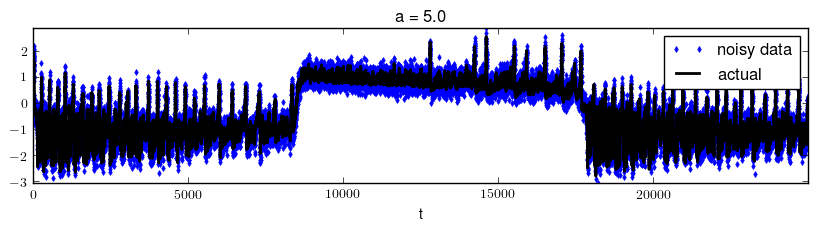

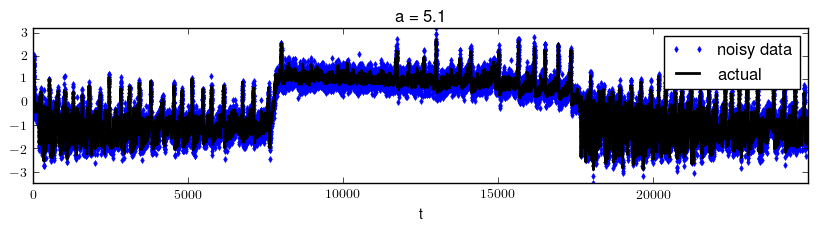

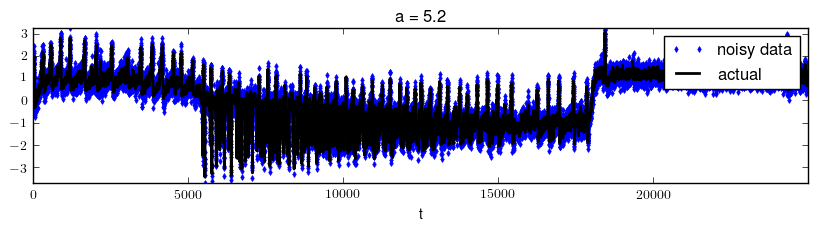

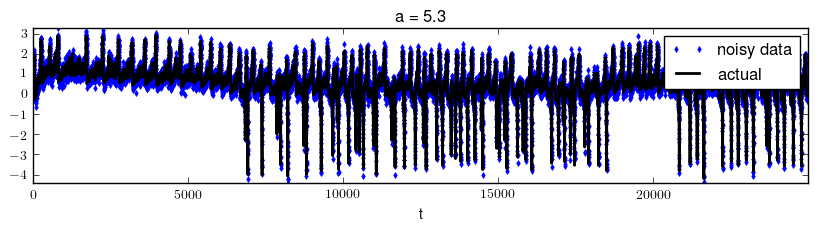

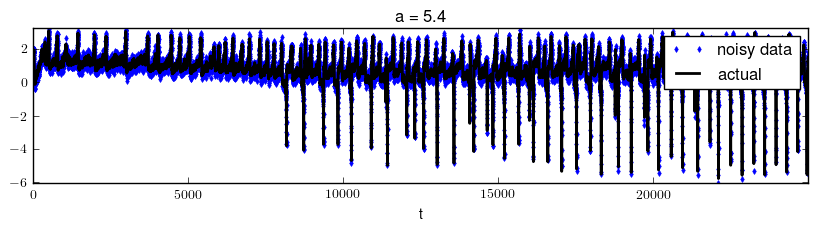

In [30]:
# reload_packages()
for a in np.arange(5,5.5,.1):
    sim = epileptor_util.epileptor_model(a=a)
    sim.generate_simulation(plot=True)
    plt.title('a = {}'.format(a))

## Parameter b

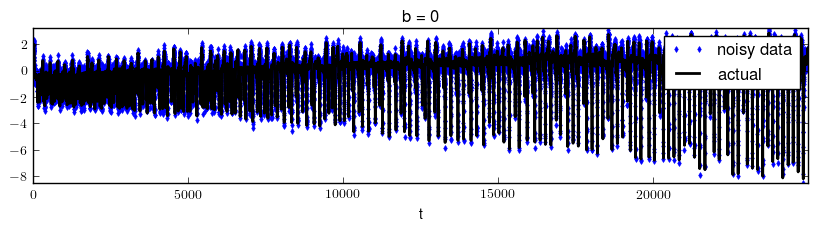

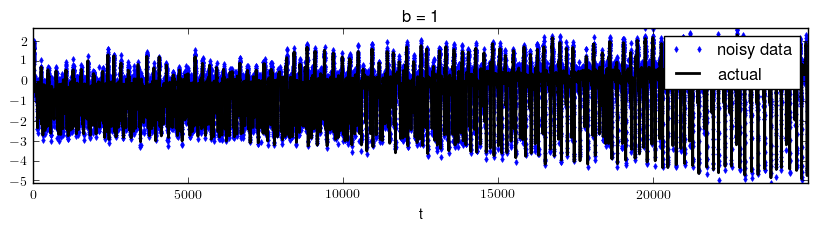

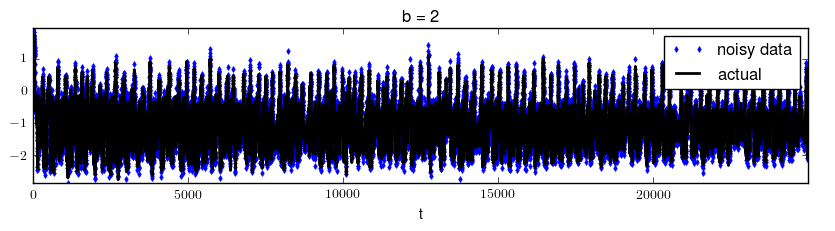

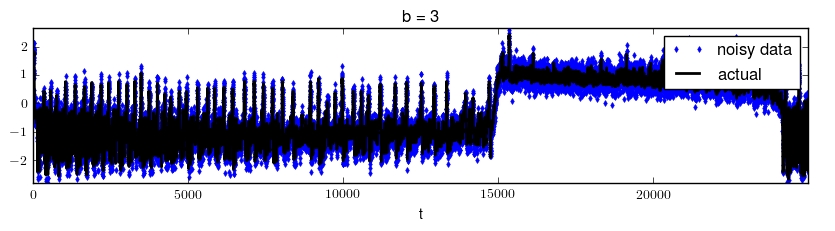

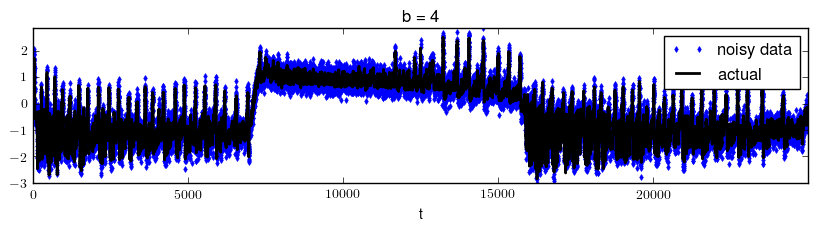

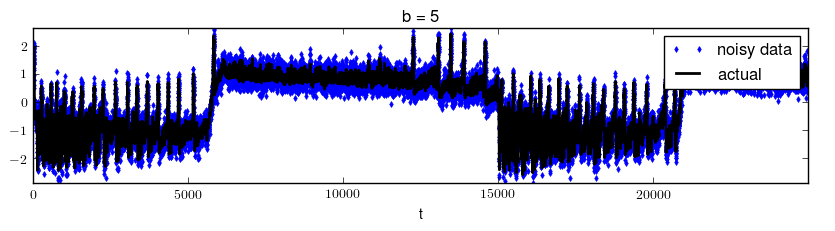

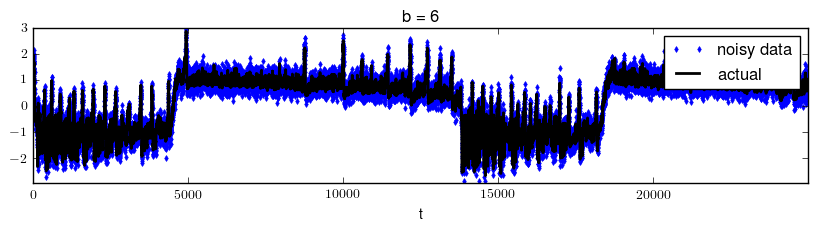

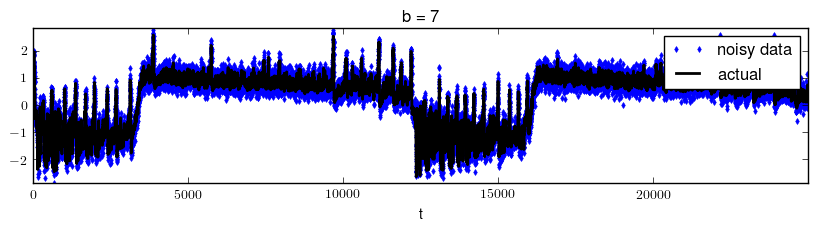

In [18]:
for b in range(8):
    sim = epileptor_util.epileptor_model(b=b)
    sim.generate_simulation(plot=True)
    plt.title('b = {}'.format(b))

## Parameter c

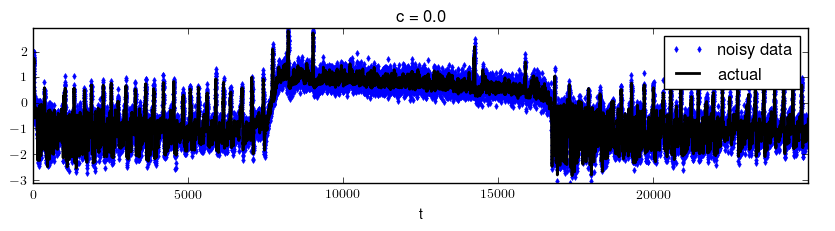

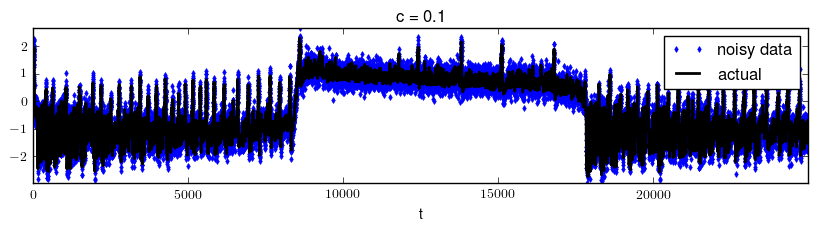

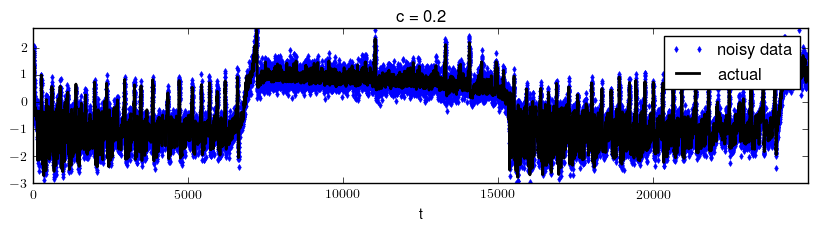

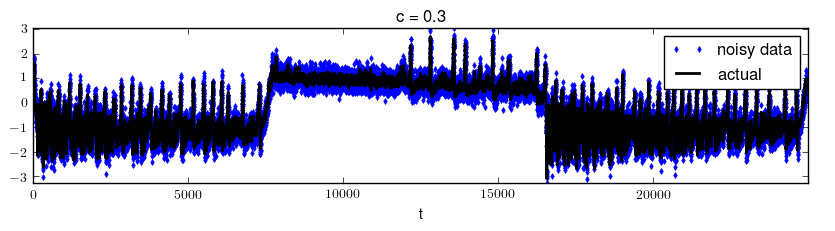

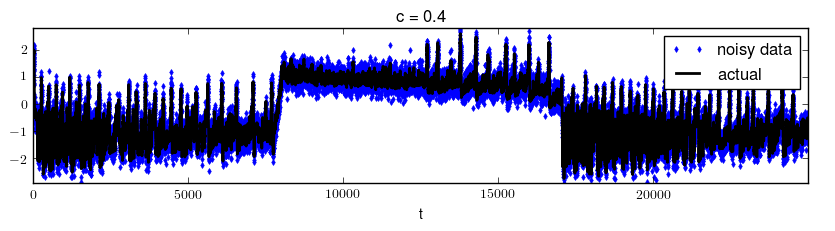

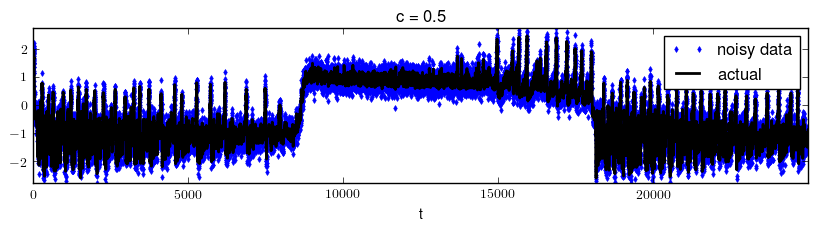

In [33]:
for c in np.arange(0,.6,.1):
    sim = epileptor_util.epileptor_model(c=c)
    sim.generate_simulation(plot=True)
    plt.title('c = {}'.format(c))

## Parameter d

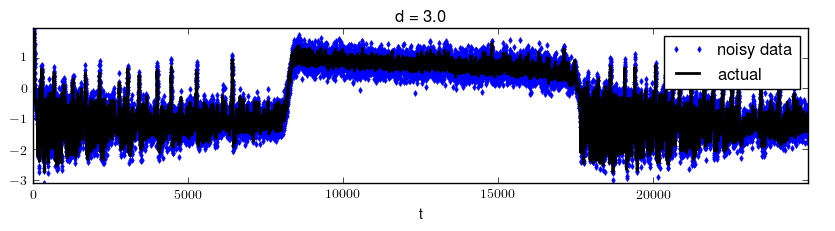

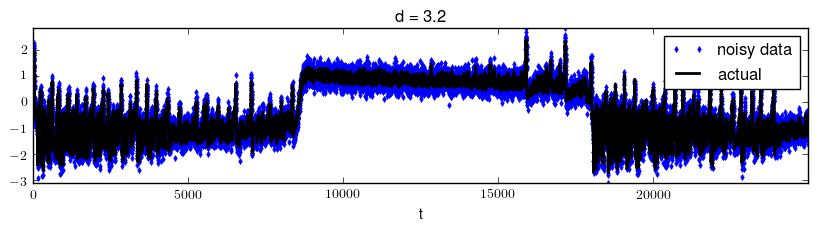

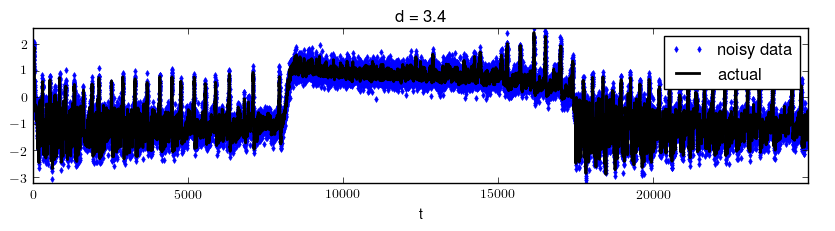

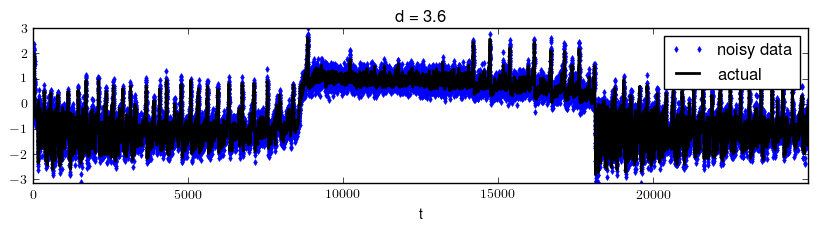

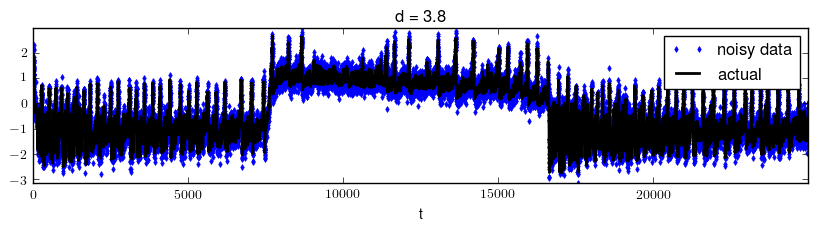

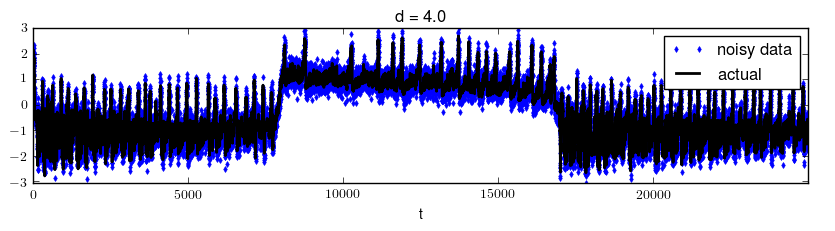

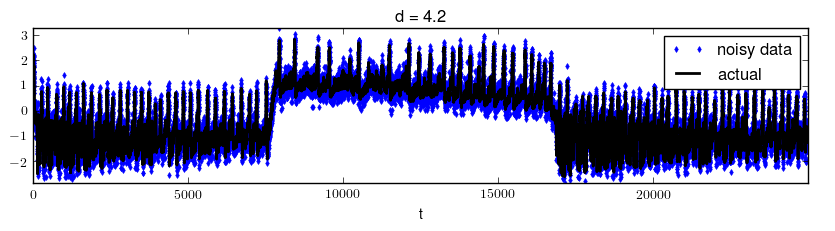

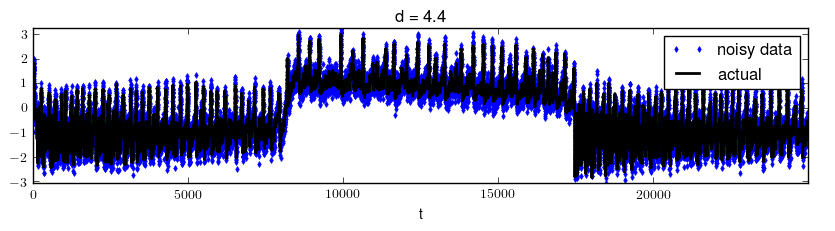

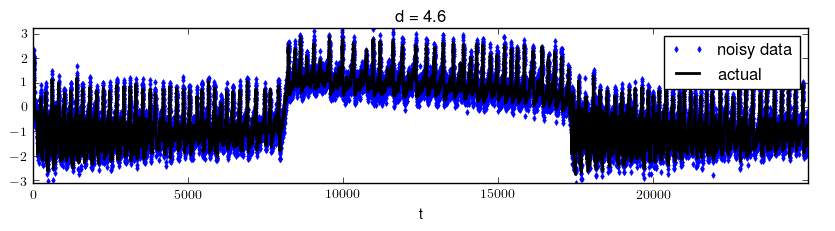

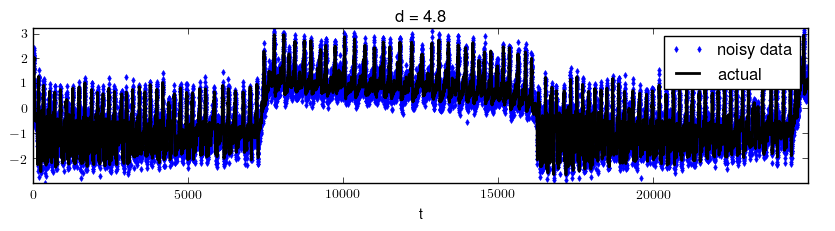

In [34]:
for d in np.arange(3,5,.2):
    sim = epileptor_util.epileptor_model(d=d)
    sim.generate_simulation(plot=True)
    plt.title('d = {}'.format(d))

## Parameter Irest1

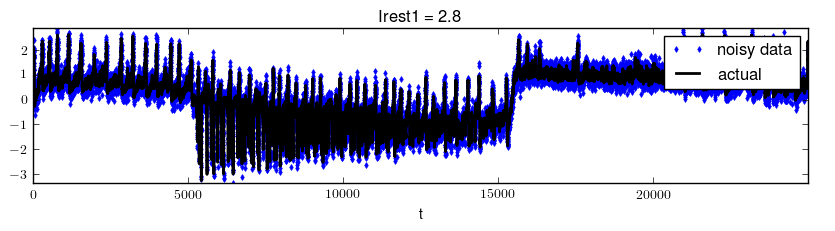

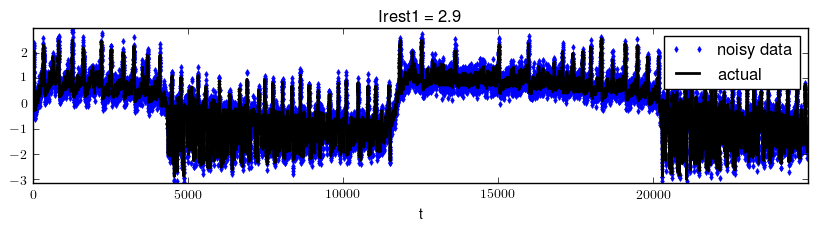

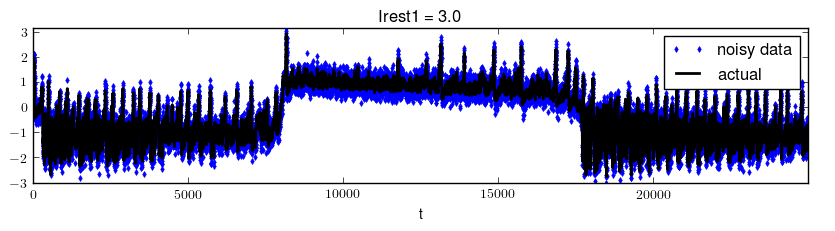

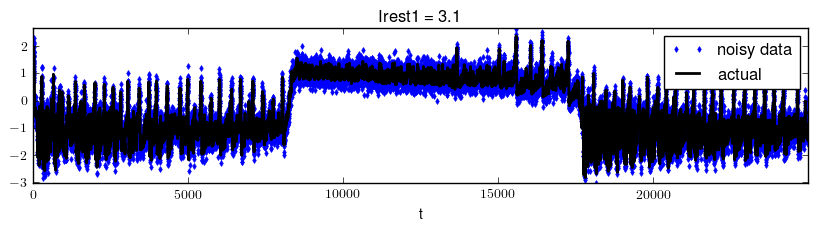

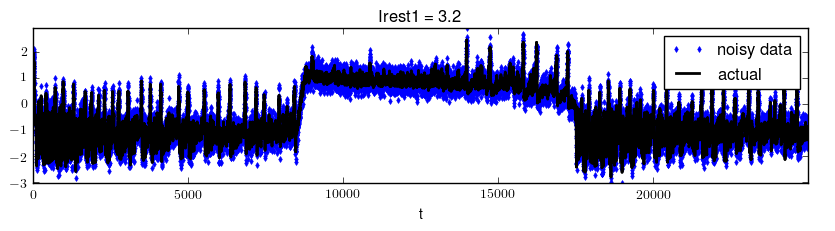

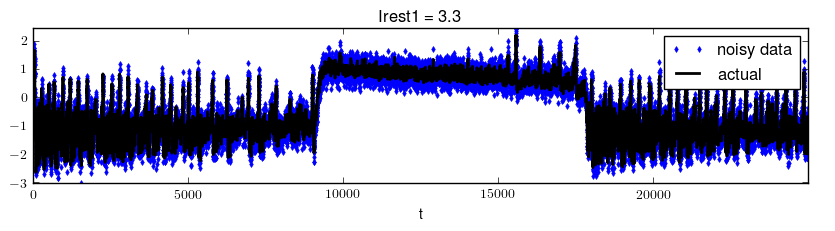

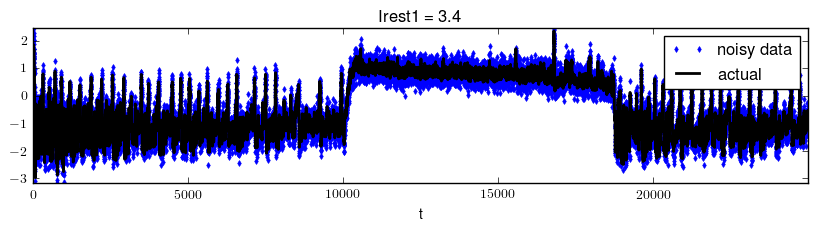

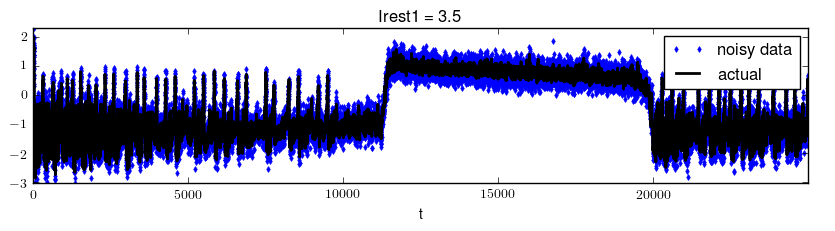

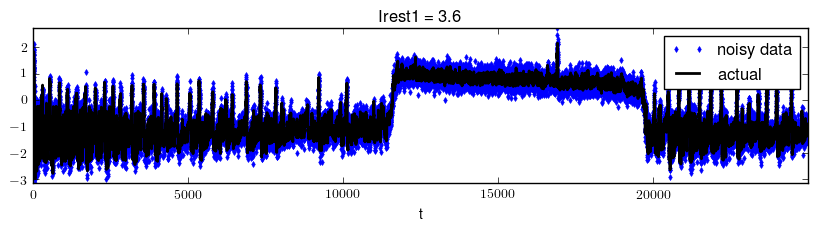

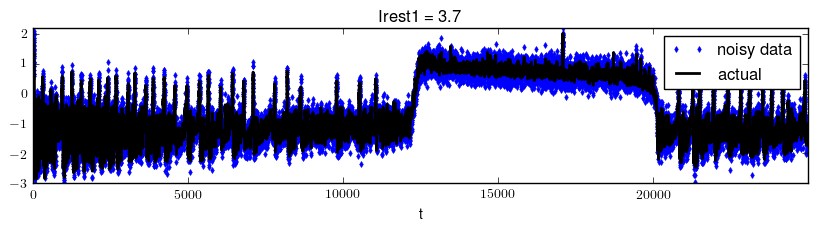

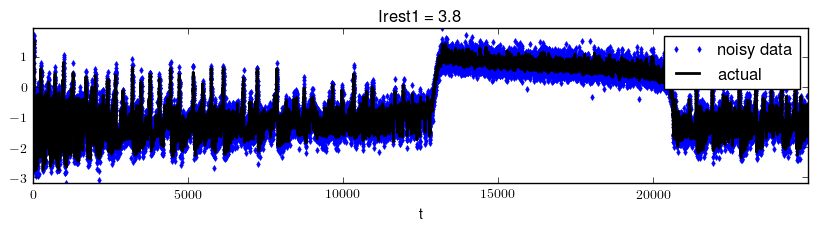

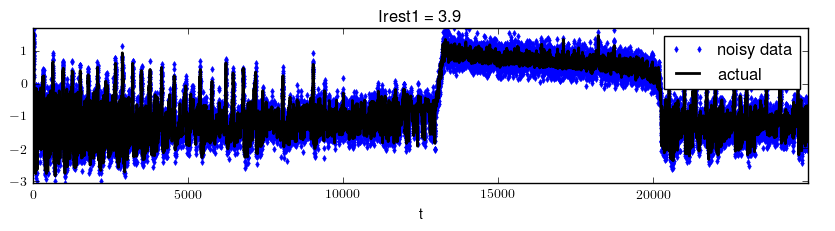

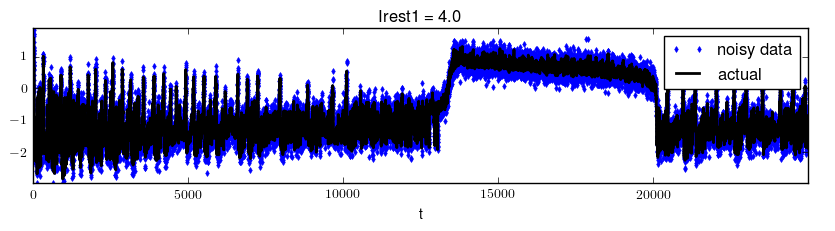

In [35]:
for Irest1 in np.arange(2.8,4.,.1):
    sim = epileptor_util.epileptor_model(Irest1=Irest1)
    sim.generate_simulation(plot=True)
    plt.title('Irest1 = {}'.format(Irest1))

## Parameter Irest2

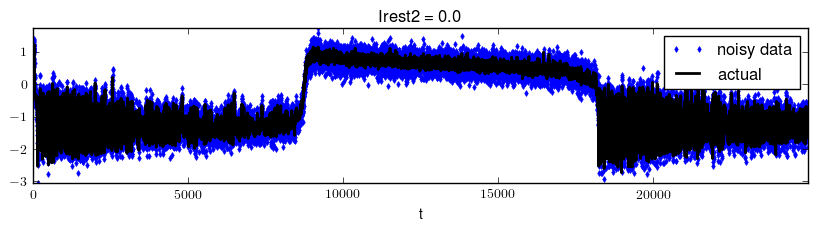

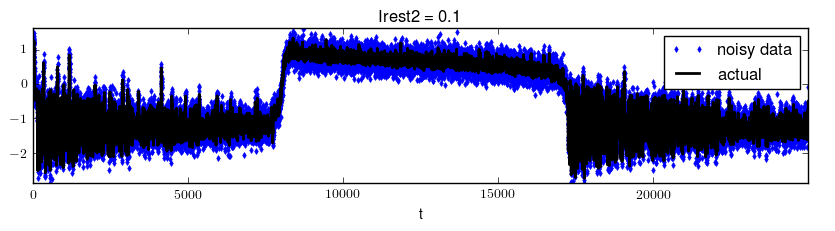

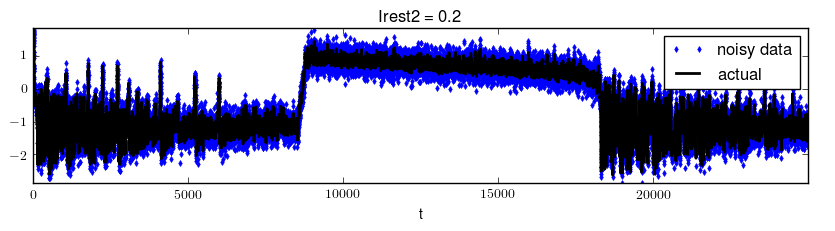

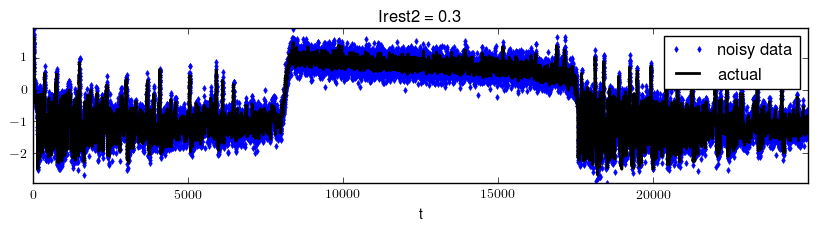

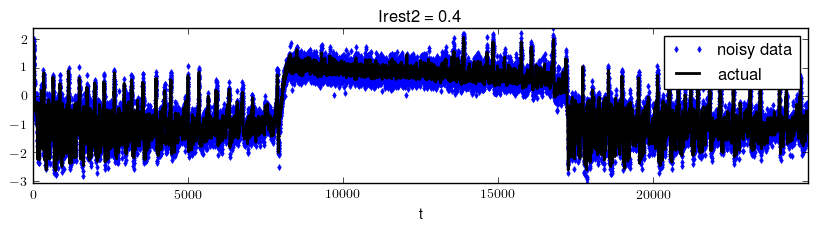

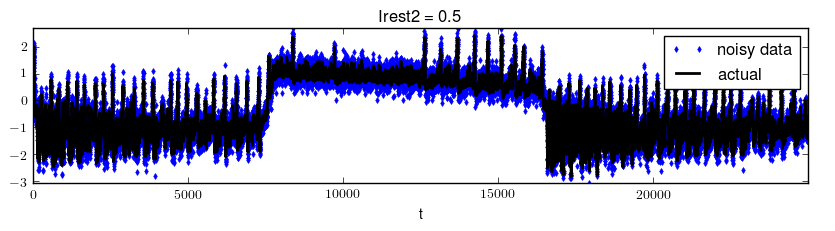

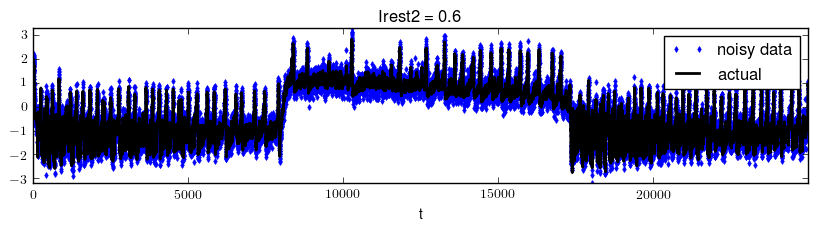

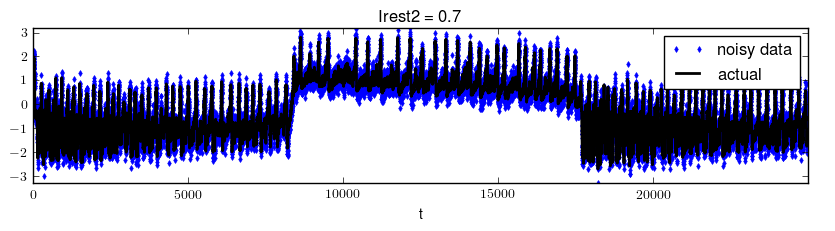

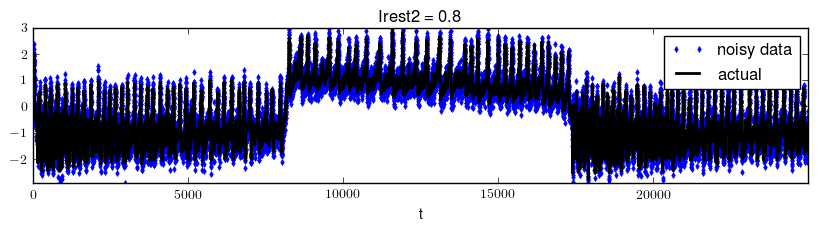

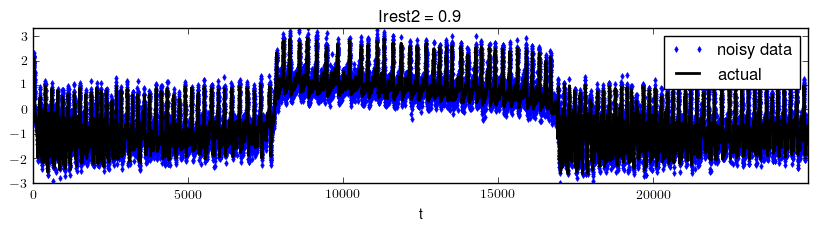

In [36]:
for Irest2 in np.arange(0.,1.,.1):
    sim = epileptor_util.epileptor_model(Irest2=Irest2)
    sim.generate_simulation(plot=True)
    plt.title('Irest2 = {}'.format(Irest2))

In [77]:
hof_scratch = load_obj('hall_of_fame')[0]

In [78]:
hof_scratch.fitness

bluepyopt.deapext.optimisations.WeightedSumFitness((1.2047286082633428,))

In [64]:
best_ind = hof_scratch[0]
evaluator.get_param_dict(best_ind)

{'Irest1': 3.1,
 'Irest2': 0.45,
 'a': 2.5891675029296337,
 'b': 5.102022557706967,
 'c': 0.3,
 'd': 3.5,
 'g_init': 0.0,
 'gamma': 0.01,
 'noise_ensemble1': 0.0,
 'noise_ensemble2': 0.0,
 'observation_sigmas': 0.0,
 'tau0': 2662.7453788856546,
 'tau1': 1.0,
 'tau2': 10.0,
 'x0': -1.6,
 'x1_init': 0.0,
 'x2_init': 0.0,
 'y0': 1.0,
 'y1_init': 1.1105462881262014,
 'y2_init': 0.0,
 'z_init': 5.024628882823126}

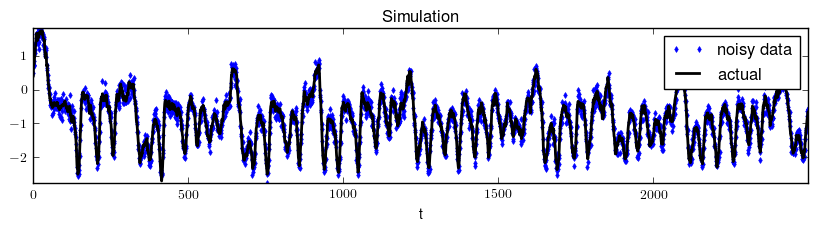

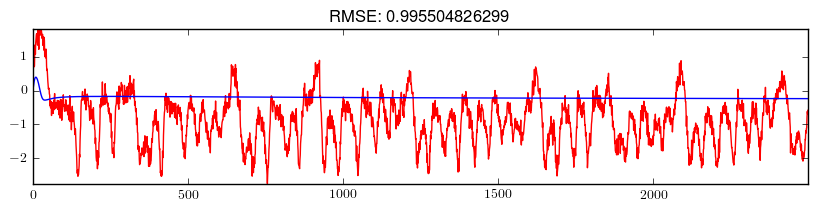

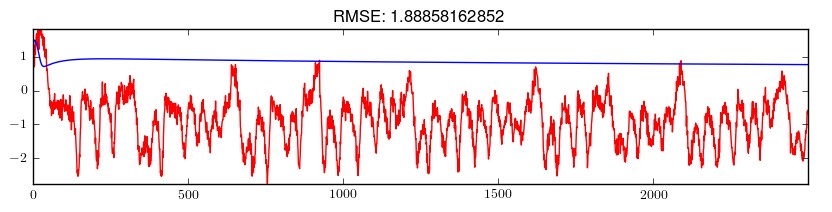

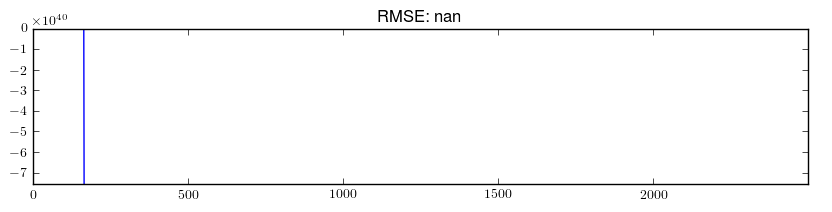

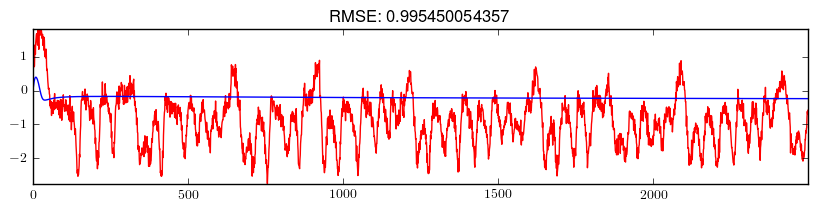

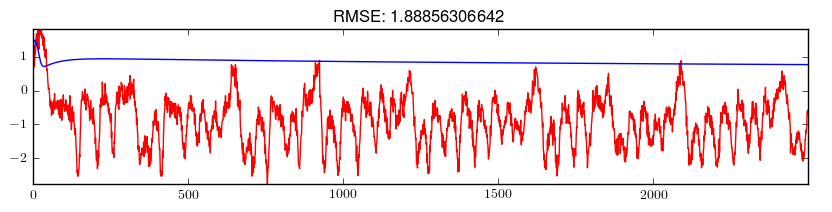

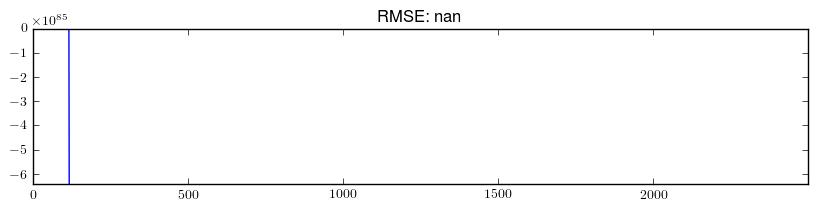

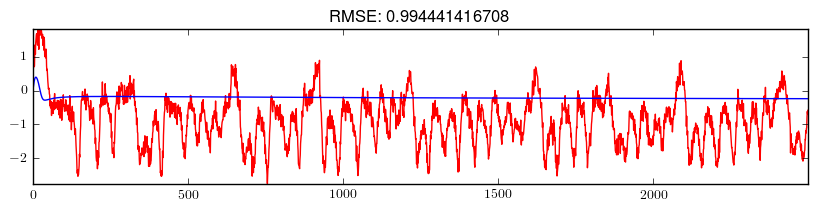

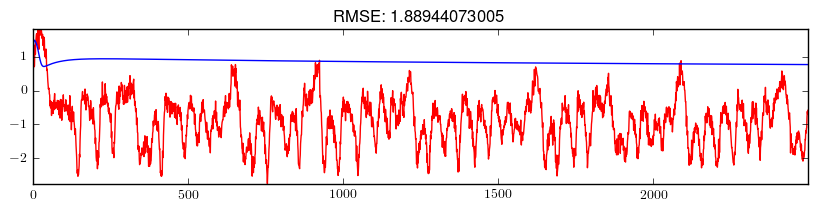

In [55]:
hof_scratch = []
for i in range(1):
    evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=True,
                                                        total_time=250,
                                                        dt_sample=0.1)
    opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=3,
                                              eta=20, mutpb=0.3, cxpb=0.7, seed=i)
    final_pop, hof_temp, log, hst = opt.run(max_ngen=3)
    hof_scratch.append(hof_temp[0])

In [79]:
import time

In [81]:
time.time()

1488920087.17161

In [165]:
opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=3,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)

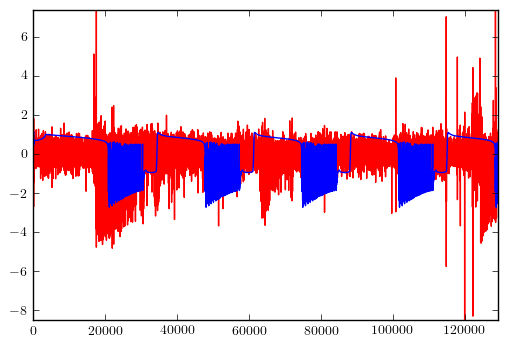

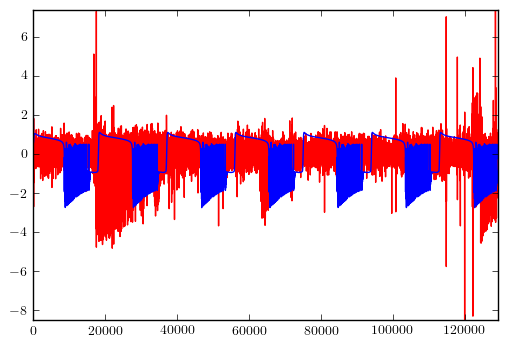

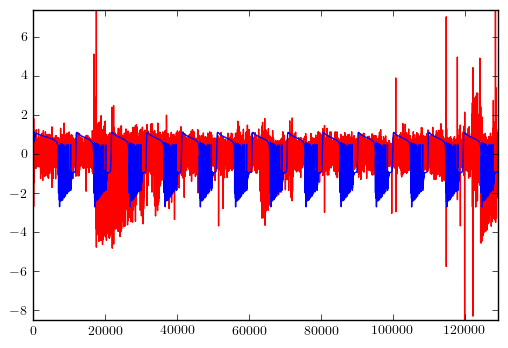

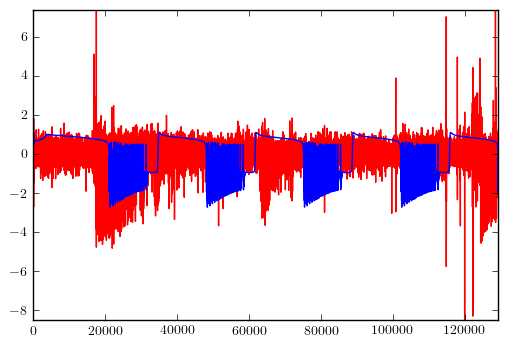

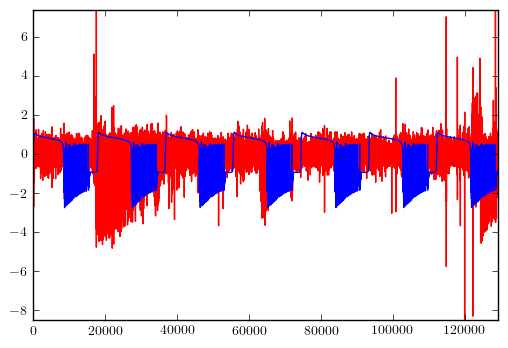

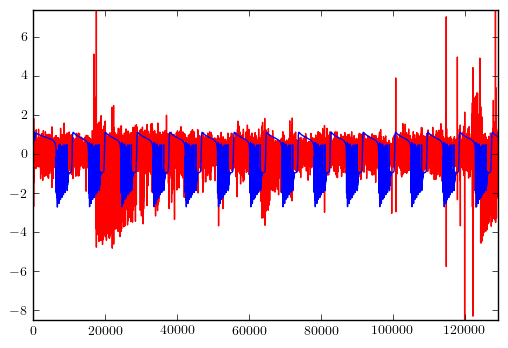

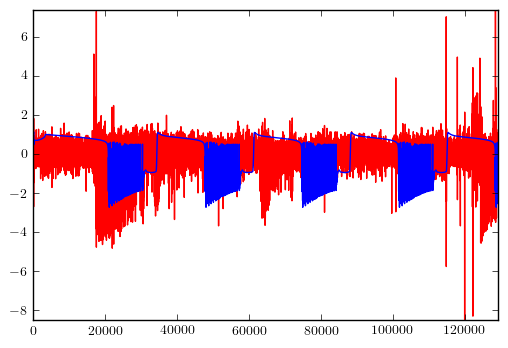

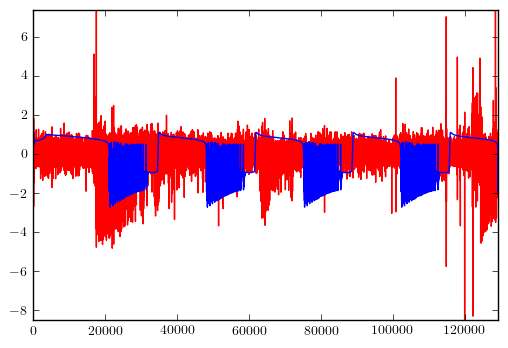

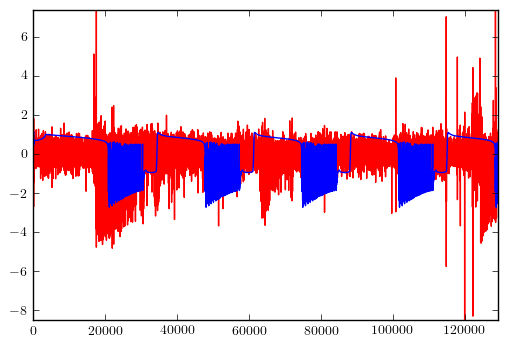

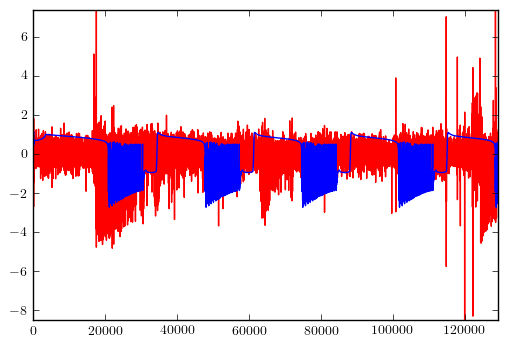

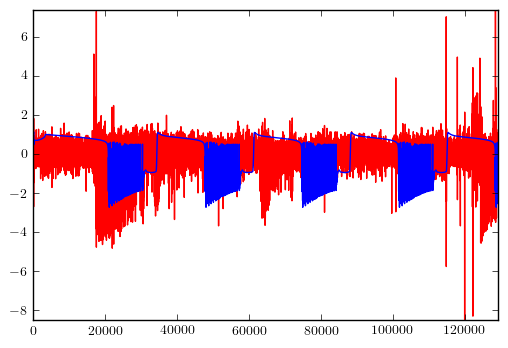

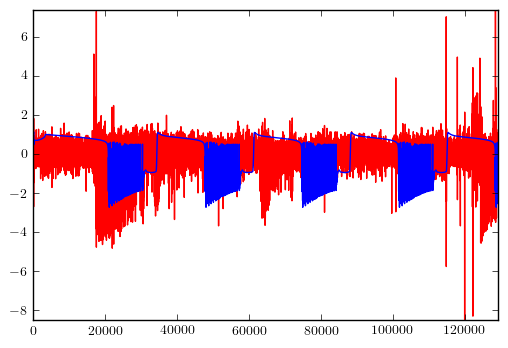

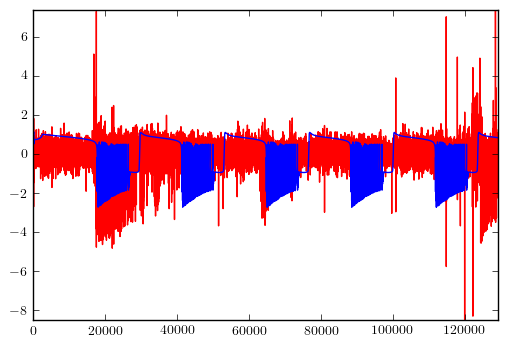

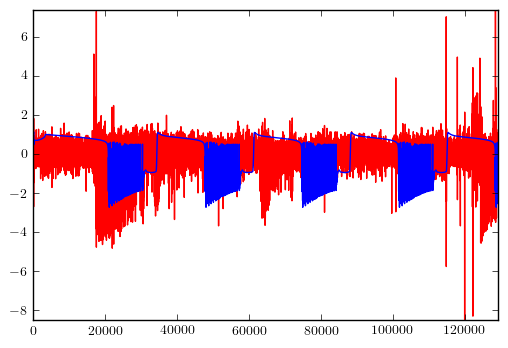

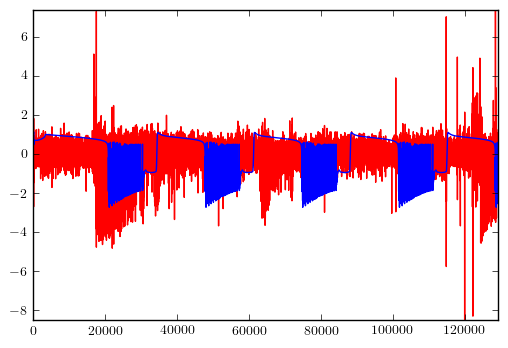

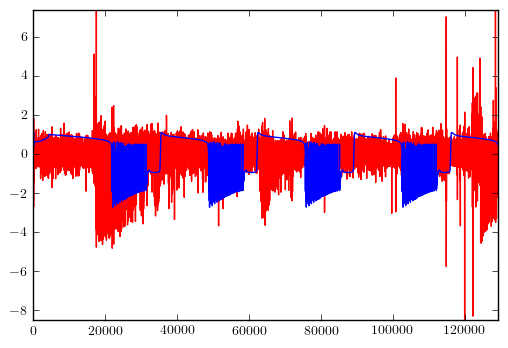

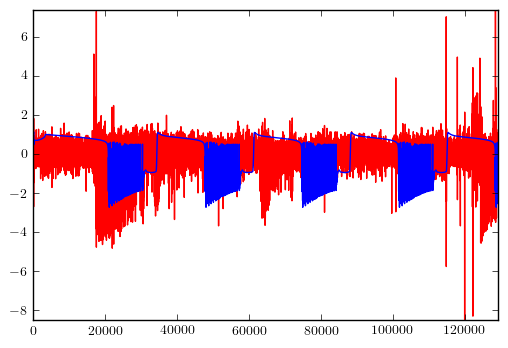

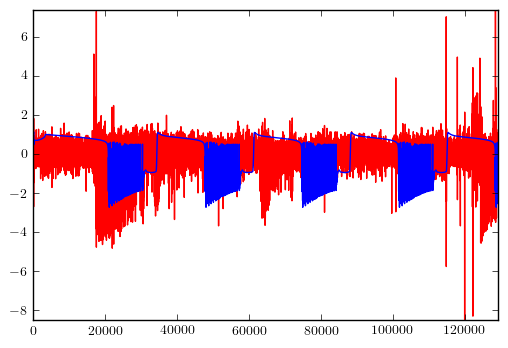

In [166]:
_, hof, log, hst = opt.run(max_ngen=10)

In [87]:
?bpop.optimisations.DEAPOptimisation

In [29]:
evaluator.

4950

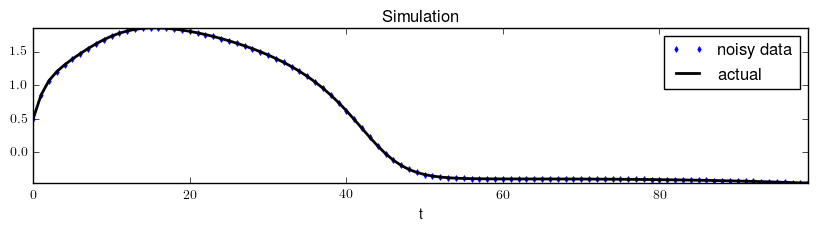

In [20]:
best = epileptor_util.epileptor_model(best_ind_dict).generate_simulation(plot=True)

In [ ]:
# protocols, sg, _, stderr = epileptor_util.load_protocols()
# dt = np.array([float(p.prot_id[:3]) for p in protocols])

In [ ]:
run_fit.plot_dt_scan(best_ind_dict, good_solutions, dt, sg, stderr)

In [ ]:
run_fit.plot_calcium_transients(protocols, best_ind_dict)

In [ ]:
run_fit.plot_log(log)

In [35]:
a = []
not a

True

In [3]:
data = f.read()

In [11]:
import pyedflib

In [12]:
from pyedflib import EdfReader

In [13]:
f = file('/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf')

In [14]:
f = pyedflib.EdfReader('/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf')

In [15]:
data = f.readSignal(0)

In [16]:
data_subsample = data[::25]
data_subsample.shape

(129250,)

In [17]:
print(f.getSampleFrequency(0))
print(f.getNSamples())
print(f.getFileDuration())

250.0
[3231250]
12925


In [19]:
f._close()

In [28]:
def smooth(trace, window=5):
    output = np.zeros_like(trace)
    for i in range(len(trace)):
        t0 = max(0, i - window)
        tf = min(len(trace), i + window)
        output[i] = sum(trace[t0:tf]) / (tf - t0)
    return output

def medfilt(trace, window=1):
    output = np.zeros_like(trace)
    for i in range(len(trace)):
        t0 = max(0, i - window)
        tf = min(len(trace), i + window)
        output[i] = np.median(trace[t0:tf])
    return output

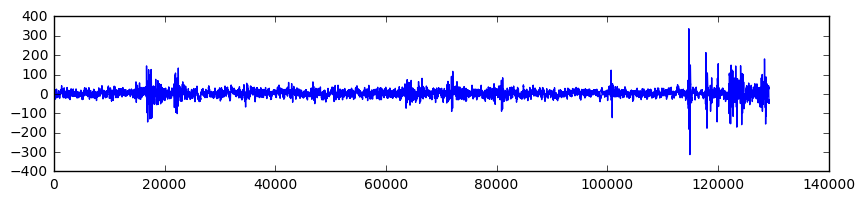

In [38]:
import matplotlib.pyplot as plt
k = 1
plt.figure(figsize=(10,2))
# plt.plot(data_subsample[::k])
plt.plot(smooth(smooth(data_subsample[::k], window=100)))
# plt.plot(medfilt(data_subsample[::10], window=5),'--')
plt.show()

In [55]:
if 1:
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)
evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=True, total_time=[], dt_sample=.1)

('total_time:', 3231250, 'dt_sample:', 0.1, 'tt/dt:', 32312500)


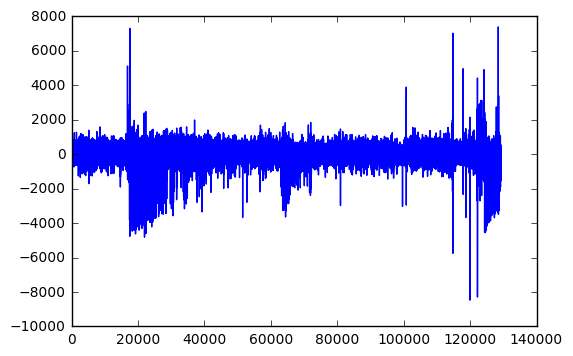

In [56]:
plt.plot(evaluator.target)
plt.show()

In [60]:
opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=1,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)

In [62]:
_, hof, log, hst = opt.run(max_ngen=1)

In [63]:
hof

In [ ]:
best_x0 = []
for i in range(1):
    evaluator = epileptor_evaluator.Epileptor_Evaluator()
    opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)
    _, hof_temp, _, _ = opt.run(max_ngen=5)
#     print(evaluator.get_param_dict(hof_temp[0])['x0'])
    best_x0.append([evaluator.get_param_dict(hof_temp[n])['x0'] for n in range(3)])
# print(best_x0)